In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

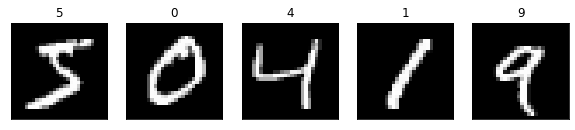

In [3]:
fig, axes = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()


In [4]:
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)


In [5]:
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)


In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.8241 - acc: 0.4192 - val_loss: 1.4621 - val_acc: 0.5818
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2767 - acc: 0.6133 - val_loss: 1.1359 - val_acc: 0.6428
Epoch 3/5
1875/1875 [==============================] - 2s 993us/step - loss: 1.1015 - acc: 0.6403 - val_loss: 1.0794 - val_acc: 0.6512
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0322 - acc: 0.6560 - val_loss: 1.0043 - val_acc: 0.6533
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9927 - acc: 0.6628 - val_loss: 0.9694 - val_acc: 0.6534


In [8]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 0s 641us/step


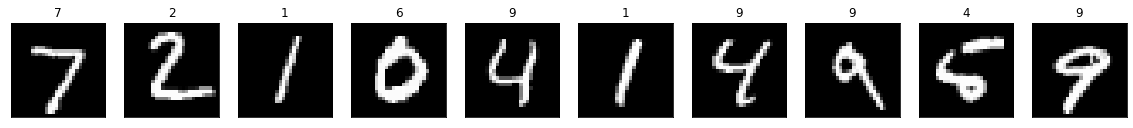

In [9]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()